In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import folium
from folium import features
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
sns.set_style("whitegrid")


In [33]:
df= pd.read_csv("C:\\Users\\ajnai\\Downloads\\partynyc\\party_in_nyc.csv")
df= pd.read_csv("C:\\Users\\ajnai\\Downloads\\partynyc\\bar_locations.csv")

In [34]:
df.head() #for first 5 rows

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17


In [60]:
df.num_calls.sort_values() # sort values

794       10
1390      10
1391      10
508       10
505       10
2087      10
1399      10
1404      10
1410      10
1421      10
2074      10
1437      10
1447      10
2067      10
1448      10
177       10
1451      10
1458      10
1465      10
2057      10
1472      10
1488      10
1492      10
2047      10
1383      10
2100      10
527       10
1361      10
2245      10
2237      10
        ... 
5        211
1077     217
63       217
1356     223
593      228
43       231
270      244
1293     245
442      250
402      257
80       267
7        271
333      282
688      286
129      287
352      289
134      301
54       302
543      319
1131     339
478      355
187      388
513      393
143      399
16       458
916      464
213      642
590      728
13      1175
162     1513
Name: num_calls, Length: 2440, dtype: int64

In [35]:
df.describe() # To calculate mean median and mode 

,Incident Zip,Latitude,Longitude,num_calls
count,2440.000000,2440.000000,2440.000000,2440.000000
mean,10631.856967,40.733985,-73.952497,37.025820
std,591.657847,0.066349,0.060292,59.641884
min,10001.000000,40.511255,-74.251277,10.000000
25%,10019.000000,40.702064,-73.987822,14.000000
50%,10463.000000,40.728351,-73.957928,21.000000
75%,11217.000000,40.765226,-73.925422,40.000000
max,11694.000000,40.910201,-73.709219,1513.000000


In [36]:
df.info() # To calculate info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 7 columns):
Location Type    2440 non-null object
Incident Zip     2440 non-null float64
City             2440 non-null object
Borough          2440 non-null object
Latitude         2440 non-null float64
Longitude        2440 non-null float64
num_calls        2440 non-null int64
dtypes: float64(3), int64(1), object(3)
memory usage: 133.5+ KB


In [132]:
df.Borough # shows me column of borough

0       STATEN ISLAND
1           MANHATTAN
2       STATEN ISLAND
3           MANHATTAN
4            BROOKLYN
5           MANHATTAN
6           MANHATTAN
7           MANHATTAN
8              QUEENS
9           MANHATTAN
10          MANHATTAN
11             QUEENS
12          MANHATTAN
13          MANHATTAN
14              BRONX
15          MANHATTAN
16          MANHATTAN
17           BROOKLYN
18           BROOKLYN
19           BROOKLYN
20           BROOKLYN
21           BROOKLYN
22          MANHATTAN
23             QUEENS
24      STATEN ISLAND
25      STATEN ISLAND
26           BROOKLYN
27          MANHATTAN
28          MANHATTAN
29           BROOKLYN
            ...      
2410         BROOKLYN
2411        MANHATTAN
2412        MANHATTAN
2413         BROOKLYN
2414         BROOKLYN
2415        MANHATTAN
2416        MANHATTAN
2417            BRONX
2418        MANHATTAN
2419        MANHATTAN
2420            BRONX
2421           QUEENS
2422         BROOKLYN
2423         BROOKLYN
2424      

In [38]:
df.isnull().sum()  # used for checking Null values

Location Type    0
Incident Zip     0
City             0
Borough          0
Latitude         0
Longitude        0
num_calls        0
dtype: int64

In [39]:
df.corr() # To find Co-relation

,Incident Zip,Latitude,Longitude,num_calls
Incident Zip,1.000000,-0.470392,0.410355,0.016136
Latitude,-0.470392,1.000000,0.389691,-0.003981
Longitude,0.410355,0.389691,1.000000,0.018971
num_calls,0.016136,-0.003981,0.018971,1.000000


In [40]:
df['Borough'].value_counts() #returns count of unique values

MANHATTAN        1076
BROOKLYN          736
QUEENS            418
BRONX             141
STATEN ISLAND      64
Unspecified         5
Name: Borough, dtype: int64

In [41]:
df[['Borough','Latitude']].head(n=10) #top 10 values in both Borough and Latitude column

,Borough,Latitude
0,STATEN ISLAND,40.544096
1,MANHATTAN,40.729793
2,STATEN ISLAND,40.544209
3,MANHATTAN,40.866376
4,BROOKLYN,40.635207
5,MANHATTAN,40.791861
6,MANHATTAN,40.718795
7,MANHATTAN,40.869549
8,QUEENS,40.739249
9,MANHATTAN,40.722789


In [42]:
np.random.seed(sum(map(ord, "distributions")))

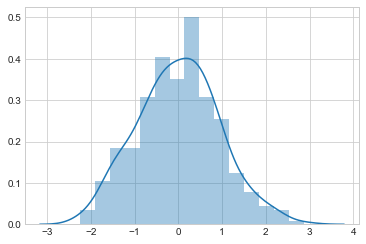

In [43]:
x = np.random.normal(size=333)
sns.distplot(x)

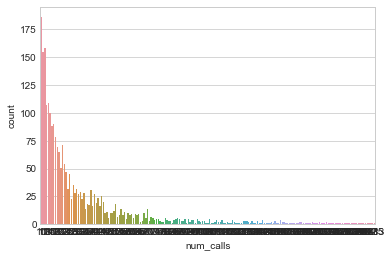

In [44]:
#Using num_calls Column , It is found out that data is distributed in skew pattern
sns.countplot(data=df,x='num_calls')

In [141]:
# sns.barplot(x="Incident Type", y="Longitude", hue="Location Type", data=df)

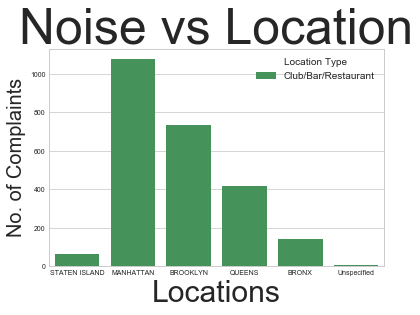

In [45]:
b = sns.countplot(x="Borough", hue="Location Type", data=df,palette="Greens_d")
b.axes.set_title("Noise vs Location",fontsize=50)
b.set_xlabel("Locations",fontsize=30)
b.set_ylabel("No. of Complaints",fontsize=20)
b.tick_params(labelsize=7)
# sns.plt.show()

#It's a noise vs location graph where in It is found that noise pollution in ManHattan is the highest

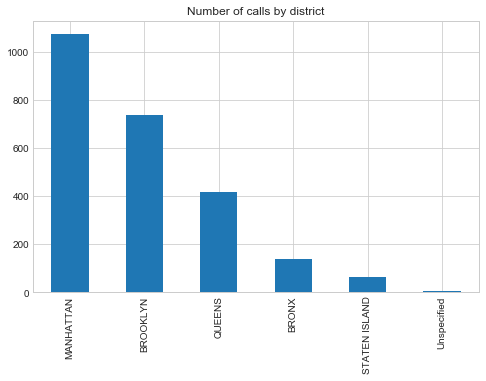

In [46]:
df['Borough'].value_counts().plot(kind='bar',title='Number of calls by district',
                                                   figsize=(8,5));
# It is found that most number of calls by district is from Manhattan 

In [47]:
train = pd.read_csv("C:\\Users\\ajnai\\Downloads\\partynyc\\train_parties.csv")
train1 = pd.read_csv("C:\\Users\\ajnai\\Downloads\\partynyc\\bar_locations.csv")


In [51]:
party = pd.read_csv("C:\\Users\\ajnai\\Downloads\\partynyc\\party_in_nyc.csv")

In [48]:
test = pd.read_csv("C:\\Users\\ajnai\\Downloads\partynyc\\test_parties.csv")

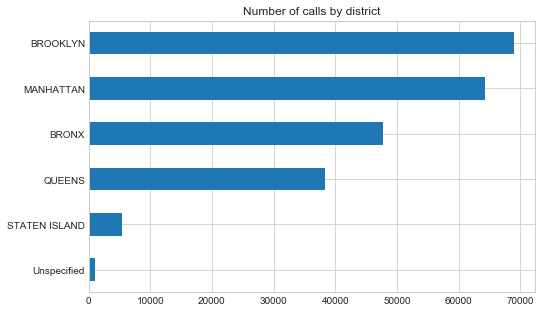

In [52]:
#party['Borough'].value_counts(ascending=True).plot(kind='barh',title='Number of calls by district',
                                                   figsize=(8,5));

In [155]:
lat = df['Latitude']
long = df['Longitude']  #defining varibles for Latitude 
                        #defining variables for Longitude

In [156]:
data_bar = pd.read_csv("C:\\Users\\ajnai\\Downloads\\partynyc\\bar_locations.csv")
data_parties = pd.read_csv("C:\\Users\\ajnai\\Downloads\\partynyc\\party_in_nyc.csv")
data_test_parties = pd.read_csv("C:\\Users\\ajnai\\Downloads\\partynyc\\test_parties.csv")
data_train_parties = pd.read_csv("C:\\Users\\ajnai\\Downloads\\partynyc\\train_parties.csv")

In [157]:
data_bar.head()

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17


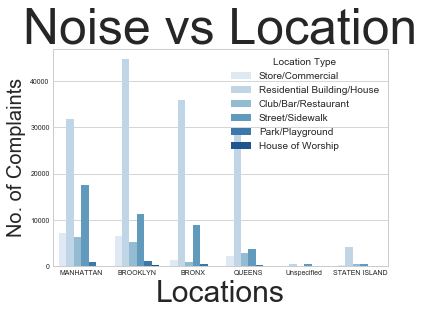

In [55]:
test = pd.read_csv("C:\\Users\\ajnai\\Downloads\partynyc\\party_in_nyc.csv")
b = sns.countplot(x="Borough", hue="Location Type", data=test,palette="Blues")
b.axes.set_title("Noise vs Location",fontsize=50)
b.set_xlabel("Locations",fontsize=30)
b.set_ylabel("No. of Complaints",fontsize=20)
b.tick_params(labelsize=7)

# This graph proves that most of cases for Noise Complaints in Brooklyn is the most followed by Manhattan 
# This graph also proves that most of cases for Nosie Complaints are from Club/bar Restaurant places followed by Store/Commericial 
# This graph proves that house of worship has the least number of calls from House Of Worship 
# It also proves that Lowest Number of Complaints is from Staten Island 
# Staten Island is the quietest borough and Brooklyn is the noiset borough followed by Manhattan 
# Bronx has more complaints from club/bar than Manhtan bars

In [158]:
data_parties.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


In [159]:
import matplotlib.pyplot as plt

In [160]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

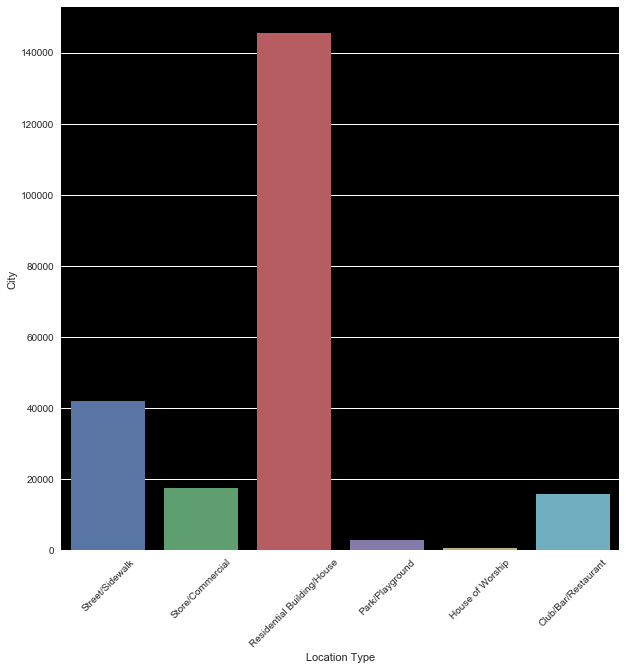

In [162]:
plt.figure(figsize=(10,10))
location_type=data_parties.groupby("Location Type")['City'].count().reset_index().sort_values(by='Location Type',ascending=False).reset_index(drop=True)
sns.barplot(x='Location Type',y='City',data=location_type)
plt.xticks(rotation=45)


#Number of calls from residential/building house is the most one 

In [163]:
df.isnull().sum()

Location Type    0
Incident Zip     0
City             0
Borough          0
Latitude         0
Longitude        0
num_calls        0
dtype: int64

In [164]:
df.dropna(inplace = True) #used for replacing NA values

In [165]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import folium
from folium import features
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import seaborn

In [166]:
pubs_map = folium.Map(location=[40.742459, -73.971765], zoom_start=12)
data = [[x[0], x[1], 1] for x in np.array(df[['Latitude', 'Longitude']])]
HeatMap(data, radius = 20).add_to(pubs_map)
pubs_map

#Heat Map showing num of calls from all the boroughs

In [167]:
df.dropna()

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17
5,Club/Bar/Restaurant,10029.0,NEW YORK,MANHATTAN,40.791861,-73.945392,211
6,Club/Bar/Restaurant,10002.0,NEW YORK,MANHATTAN,40.718795,-73.989012,41
7,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.869549,-73.916348,271
8,Club/Bar/Restaurant,11373.0,ELMHURST,QUEENS,40.739249,-73.884457,15
9,Club/Bar/Restaurant,10013.0,NEW YORK,MANHATTAN,40.722789,-74.004596,43


In [168]:
df.isnull().sum()

Location Type    0
Incident Zip     0
City             0
Borough          0
Latitude         0
Longitude        0
num_calls        0
dtype: int64

In [ ]:
df.apply(lambda x: sum(x.isnull()), axis=0)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
#df['Borough'].value_counts(ascending=True).plot(kind='barh',title='Number of calls by district',
                                                   figsize=(8,5));

In [189]:
#pubs_map = folium.Map(location=[40.742459, -73.971765], zoom_start=12)

In [16]:
from __future__ import print_function
import urllib3 #  pip install -i https://pypi.anaconda.org/pypi/simple urllib3
import unicodedata
from bs4 import BeautifulSoup, SoupStrainer, Comment
import warnings
import datetime
warnings.filterwarnings('ignore')
aj = []
d = []
status=[]
time= []

In [17]:
url='https://www.whatsapp.com/' #url for the website 

In [18]:
http = urllib3.PoolManager()
response = http.request('GET',url)
response.status               #response.status

200

In [19]:
soup=BeautifulSoup(response.data, "lxml")

In [20]:
soup.title          #response title

<title>WhatsApp</title>

In [21]:
soup.find_all('a')  #find all a

[<a class="page-header__logo" href="https://www.whatsapp.com"></a>,
 <a href="https://www.whatsapp.com/">WhatsApp</a>,
 <a></a>,
 <a class="lng-link" data-lng="az" dir="auto" href="?l=az">Azərbaycanca</a>,
 <a class="lng-link" data-lng="af" dir="auto" href="?l=af">Afrikaans</a>,
 <a class="lng-link" data-lng="id" dir="auto" href="?l=id">Bahasa Indonesia</a>,
 <a class="lng-link" data-lng="ms" dir="auto" href="?l=ms">Bahasa Melayu</a>,
 <a class="lng-link" data-lng="ca" dir="auto" href="?l=ca">Català</a>,
 <a class="lng-link" data-lng="cs" dir="auto" href="?l=cs">Česky</a>,
 <a class="lng-link" data-lng="da" dir="auto" href="?l=da">Dansk</a>,
 <a class="lng-link" data-lng="de" dir="auto" href="?l=de">Deutsch</a>,
 <a class="lng-link" data-lng="et" dir="auto" href="?l=et">Eesti</a>,
 <a class="lng-link" data-lng="en" dir="auto" href="?l=en">English</a>,
 <a class="lng-link" data-lng="es" dir="auto" href="?l=es">Español</a>,
 <a class="lng-link" data-lng="fr" dir="auto" href="?l=fr">Franç

In [22]:
for a in soup.find_all('a', href=True):
    print("Found Url :", a['href']) # find all 'a' tag where href is true In short collect all external links 

Found Url : https://www.whatsapp.com
Found Url : https://www.whatsapp.com/
Found Url : ?l=az
Found Url : ?l=af
Found Url : ?l=id
Found Url : ?l=ms
Found Url : ?l=ca
Found Url : ?l=cs
Found Url : ?l=da
Found Url : ?l=de
Found Url : ?l=et
Found Url : ?l=en
Found Url : ?l=es
Found Url : ?l=fr
Found Url : ?l=ga
Found Url : ?l=hr
Found Url : ?l=it
Found Url : ?l=sw
Found Url : ?l=lv
Found Url : ?l=lt
Found Url : ?l=hu
Found Url : ?l=nl
Found Url : ?l=nb
Found Url : ?l=uz
Found Url : ?l=fil
Found Url : ?l=pl
Found Url : ?l=pt_br
Found Url : ?l=pt_pt
Found Url : ?l=ro
Found Url : ?l=sq
Found Url : ?l=sk
Found Url : ?l=sl
Found Url : ?l=fi
Found Url : ?l=sv
Found Url : ?l=vi
Found Url : ?l=tr
Found Url : ?l=el
Found Url : ?l=bg
Found Url : ?l=kk
Found Url : ?l=mk
Found Url : ?l=ru
Found Url : ?l=sr
Found Url : ?l=uk
Found Url : ?l=he
Found Url : ?l=ar
Found Url : ?l=fa
Found Url : ?l=ur
Found Url : ?l=bn
Found Url : ?l=hi
Found Url : ?l=gu
Found Url : ?l=kn
Found Url : ?l=mr
Found Url : ?l=ta


In [23]:
for a in soup.find_all('a', href=True):
    href = a.get('href')
    if "http" in href:
        aj.append(href)
        d.append(a.text.strip())
for b in aj:
    print(b)
print(d)
   # for loop to get all 'a' tags in href  and save it in list 

https://www.whatsapp.com
https://www.whatsapp.com/
https://translate.whatsapp.com
https://web.whatsapp.com/
https://www.whatsapp.com/features/
https://www.whatsapp.com/download/
https://www.whatsapp.com/security/
https://faq.whatsapp.com/
https://www.whatsapp.com/download/
https://www.whatsapp.com/features/
https://www.whatsapp.com/security/
https://faq.whatsapp.com/
https://www.whatsapp.com/contact/
https://www.whatsapp.com/download/
https://play.google.com/store/apps/details?id=com.whatsapp
http://itunes.apple.com/us/app/whatsapp-messenger/id310633997?mt=8
https://www.whatsapp.com/business/
https://www.whatsapp.com/features/
https://www.whatsapp.com/features/
https://www.whatsapp.com/security/
https://www.whatsapp.com/download/
https://web.whatsapp.com/
https://www.whatsapp.com/business/
https://www.whatsapp.com/about/
https://www.whatsapp.com/join/
https://www.whatsappbrand.com/
https://www.whatsapp.com/contact/
https://blog.whatsapp.com
https://www.whatsapp.com/download/
https://ww

In [24]:
def checkurl(link):
    now =datetime.datetime.now().strftime("%y-%m-%d %H:%M:%S")
    response= http.request('GET',link)
    print(response.status)
    status.append(response.status == 200)
    time.append(now)
    #check url if it is response = 200
    #if resposne == 200 print it 
    

In [25]:
print(aj)
for link in aj:
    checkurl(link)
print(status)

# print status for links

['https://www.whatsapp.com', 'https://www.whatsapp.com/', 'https://translate.whatsapp.com', 'https://web.whatsapp.com/', 'https://www.whatsapp.com/features/', 'https://www.whatsapp.com/download/', 'https://www.whatsapp.com/security/', 'https://faq.whatsapp.com/', 'https://www.whatsapp.com/download/', 'https://www.whatsapp.com/features/', 'https://www.whatsapp.com/security/', 'https://faq.whatsapp.com/', 'https://www.whatsapp.com/contact/', 'https://www.whatsapp.com/download/', 'https://play.google.com/store/apps/details?id=com.whatsapp', 'http://itunes.apple.com/us/app/whatsapp-messenger/id310633997?mt=8', 'https://www.whatsapp.com/business/', 'https://www.whatsapp.com/features/', 'https://www.whatsapp.com/features/', 'https://www.whatsapp.com/security/', 'https://www.whatsapp.com/download/', 'https://web.whatsapp.com/', 'https://www.whatsapp.com/business/', 'https://www.whatsapp.com/about/', 'https://www.whatsapp.com/join/', 'https://www.whatsappbrand.com/', 'https://www.whatsapp.com/

In [26]:
# Create a Pandas dataframe from some data.
df = pd.DataFrame({'Data': aj,'Status':status,'Description':d,'Time': time})

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('a3.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()
